Purpose:
Predict if a person will default their credit card next month

In [1]:
import pandas as pd
# windows file path
df=pd.read_csv('D:/Dropbox/Machine Learning/Data/Credit Default/UCI_Credit_Card.csv')
# mac file path
# df=pd.read_csv('/Users/jiahuali1991/Dropbox/Machine Learning/Data/Credit Default/UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
21942,21943,200000.0,2,1,2,27,-2,-2,-2,-2,...,3190.0,5238.0,950.0,3690.0,4460.0,3190.0,5238.0,950.0,250.0,1
28860,28861,140000.0,2,1,3,48,1,-1,-1,-1,...,0.0,780.0,642.0,780.0,1176.0,0.0,780.0,642.0,0.0,0
10845,10846,500000.0,1,1,1,41,-1,-1,-1,-2,...,-50.0,10037.0,79.0,1558.0,0.0,0.0,10087.0,79.0,471.0,0
4223,4224,50000.0,1,2,2,52,0,0,-1,0,...,12291.0,16674.0,17331.0,8080.0,15012.0,10000.0,8000.0,2000.0,2000.0,0
19140,19141,160000.0,2,2,1,37,0,0,0,0,...,6714.0,-319.0,3583.0,5000.0,5017.0,5000.0,0.0,6774.0,0.0,0


In [2]:
# rename two columns
df=df.rename(columns={'default.payment.next.month':'def_pay','PAY_0':'PAY_1'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

# dealing with categorical variables

In [3]:
# categorical variables description
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [4]:
# SEX: replace 1 with male and 2 with female
df['SEX'] = df['SEX'].replace(1,'male').replace(2,'female')
df['SEX'].value_counts(dropna=False)

female    18112
male      11888
Name: SEX, dtype: int64

In [5]:
# EDUCATION: 
df['EDUCATION'] = df['EDUCATION'].replace(0,5).replace(6,5).replace(1,'graduate school').replace(2,'university').replace(3,'high school').replace(4,'others').replace(5,'unknown')
df['EDUCATION'].value_counts(dropna=False)

university         14030
graduate school    10585
high school         4917
unknown              345
others               123
Name: EDUCATION, dtype: int64

In [6]:
df['SEX'] = df['SEX'].replace(1,'male').replace(2,'female')
df['SEX'].value_counts(dropna=False)

female    18112
male      11888
Name: SEX, dtype: int64

In [7]:
# MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3).replace(1,'married').replace(2,'single').replace(3,'others')
df['MARRIAGE'].value_counts(dropna=False)

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

In [8]:
# categorical variables description
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,5,3
top,female,university,single
freq,18112,14030,15964


In [9]:
# check data types: sex, education and marriage - object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [10]:
# check missing value
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [11]:
# payment delay description
df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


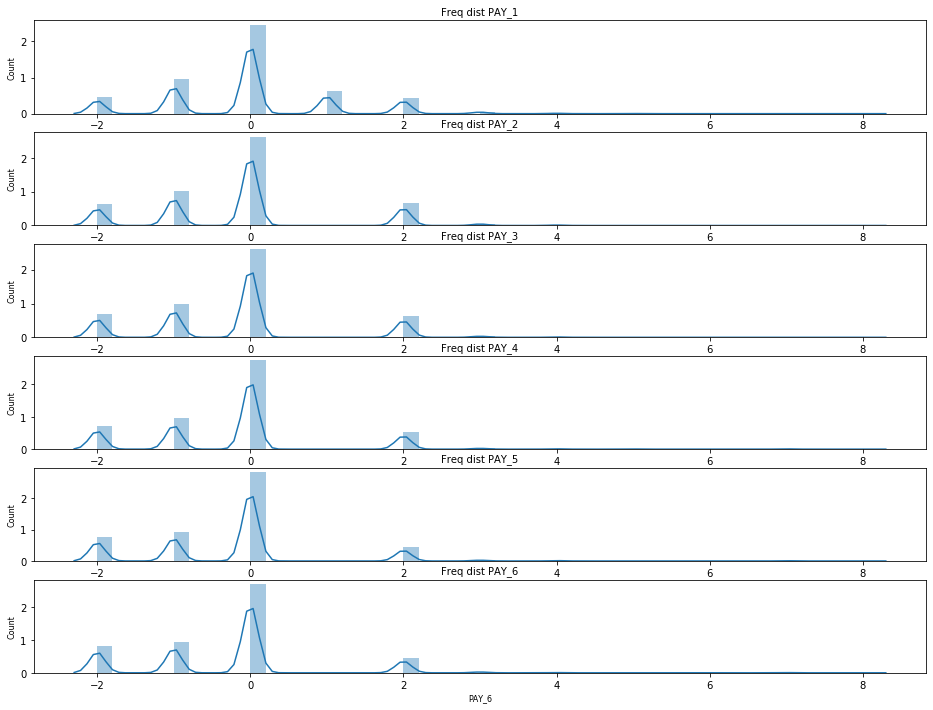

In [12]:
# check distribution
col_names = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

import seaborn as sns
for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [13]:
# bill statement description
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


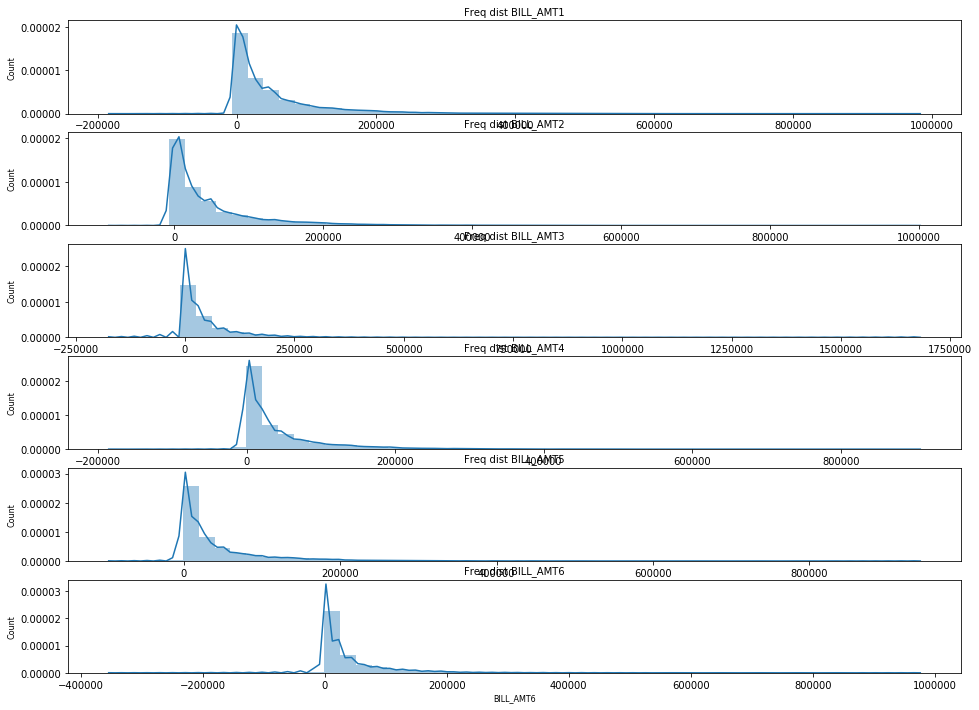

In [14]:
# check distribution
col_names = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

import seaborn as sns
for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [15]:
# previous payment description
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


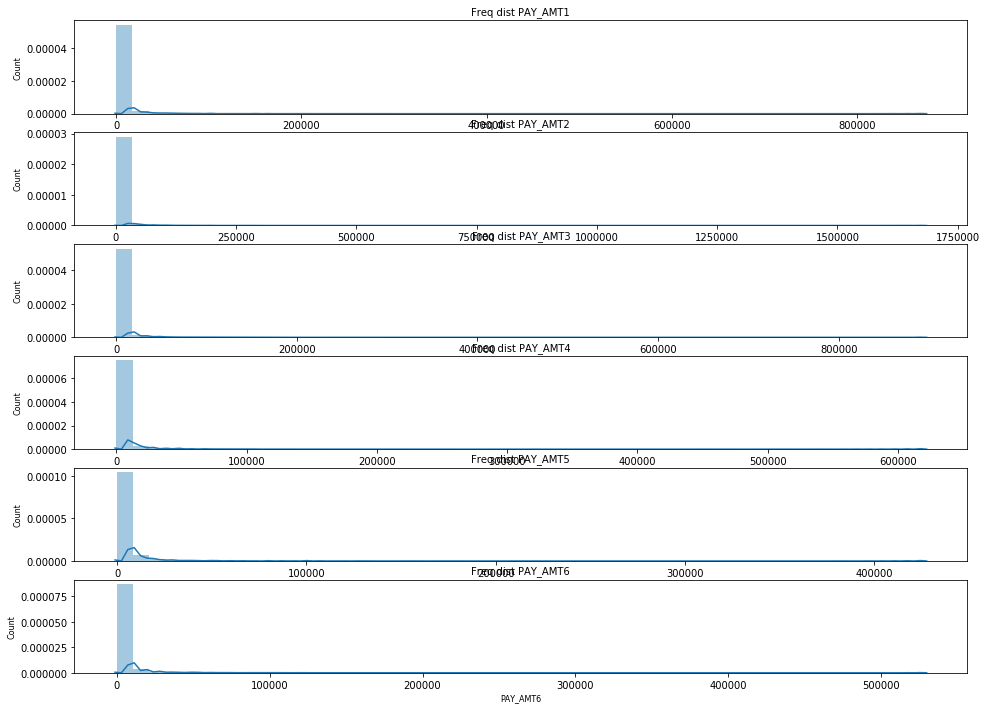

In [16]:
# check distribution
col_names = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

import seaborn as sns
for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [17]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

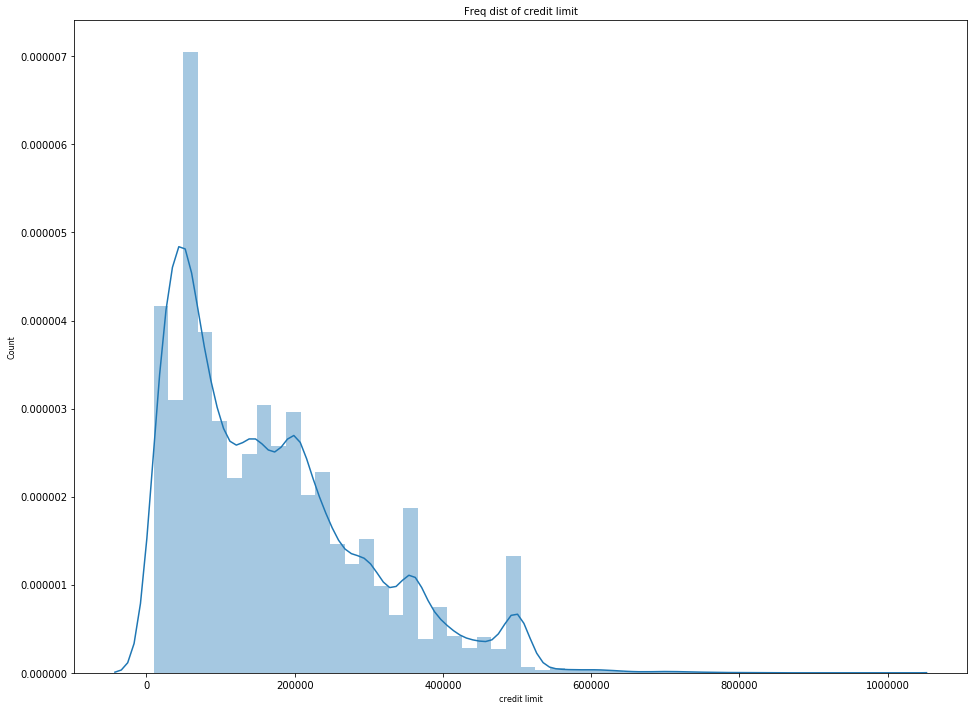

In [18]:
# check distribution
fig, ax = plt.subplots(figsize=(16,12))
sns.distplot(df.LIMIT_BAL, hist=True)
ax.set_title('Freq dist of credit limit', fontsize=10)
ax.set_xlabel('credit limit', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


In [19]:
# Calculate default rate
df.def_pay.sum()/len(df.def_pay)

0.2212

In [20]:
# prepare X and y for machine learning
y=df['def_pay'].copy()
print(y.sample(5))
X = df.drop(['def_pay','ID'],axis=1)
print(X.columns)

9356     1
13688    0
14977    0
15662    0
2432     1
Name: def_pay, dtype: int64
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [21]:
# can select the individual columns 
features=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
       
X = df[features].copy()

In [22]:
# split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


#categorical_cols = ['SEX', 'EDUCATION', 'MARRIGE']
#numerical_cols = ['LIMIT_BAL', 'AGE', 'PAY_1',
#       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# we can achive the same goal by 
# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('standardize', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Dummy Classifier - baseline model

In [24]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy="most_frequent")
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_train_pred = my_pipeline.predict(X_train)
y_pred = my_pipeline.predict(X_test)


from sklearn.metrics import accuracy_score
print('training set model accuracy = ', accuracy_score(y_train, y_train_pred))

from sklearn.metrics import f1_score
print('training set model f1 score = ', f1_score(y_train, y_train_pred))

from sklearn.metrics import accuracy_score
print('testing set model accuracy = ', accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print('testing set model f1 score = ', f1_score(y_test, y_pred))


from sklearn.metrics import classification_report
print('testing set model classification report : \n ', classification_report(y_test, y_pred))

training set model accuracy =  0.7773333333333333
training set model f1 score =  0.0
testing set model accuracy =  0.7822222222222223
testing set model f1 score =  0.0
testing set model classification report : 
                precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\jiahu_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [27]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import randint

param_dist = {"max_depth": randint(1, 20),
              "max_features": randint(1, 22),
              "min_samples_leaf": randint(1, 20),
              "criterion": ["gini", "entropy"]}

tree_cv = RandomizedSearchCV(DecisionTreeClassifier(),param_dist,cv=5,scoring='f1',n_jobs=-1, verbose=5,n_iter=500)



# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', tree_cv)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

# save grid search cross validation results to file
results = pd.DataFrame(tree_cv.cv_results_)
results.to_csv('credit default decision tree random search result.csv',index=False)
print('random search cross validation results saved')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 1652 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 2192 tasks      | elapsed:   47.9s


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 21, 'min_samples_leaf': 7}
Best score is 0.4812620444767517
random search cross validation results saved


[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   53.9s finished


In [28]:
# use the best hyper parameters to build the model
decision_tree_clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, max_features = 21, min_samples_leaf = 7)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('clf', decision_tree_clf)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)
y_train_pred = my_pipeline.predict(X_train)
y_pred = my_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
print('training set model accuracy = ', accuracy_score(y_train, y_train_pred))

from sklearn.metrics import f1_score
print('training set model f1 score = ', f1_score(y_train, y_train_pred))

from sklearn.metrics import accuracy_score
print('testing set model accuracy = ', accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print('testing set model f1 score = ', f1_score(y_test, y_pred))


from sklearn.metrics import classification_report
print('testing set model classification report : \n ', classification_report(y_test, y_pred))

training set model accuracy =  0.8259047619047619
training set model f1 score =  0.4982157562448531
testing set model accuracy =  0.8214444444444444
testing set model f1 score =  0.47155540940480106
testing set model classification report : 
                precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# K Nearest Neighbour

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_neighbors':[1,3,5,10],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'],
    'leaf_size':[2,10,20]
}

from sklearn.neighbors import KNeighborsClassifier
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='accuracy',verbose=5,n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', grid)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

# save grid search cross validation results to file
results = pd.DataFrame(grid.cv_results_)
results.to_csv('credit default knn grid search result.csv',index=False)
print('grid search cross validation results saved')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.4min
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\jiahu_000\anaconda3\lib\site-packages\joblib\parallel.py", line 909, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "C:\Users\jiahu_000\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 562, in wrap_future_result
    return future.result(timeout=timeout)
  File "C:\Users\jiahu_000\anaconda3\lib\concurrent\futures\_base.py", line 430, in result
    self._condition.wait(timeout)
  File "C:\Users\jiahu_000\anaconda3\lib\threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\jiahu_000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-bb65d62c63e1>", line 19, in <module>
    my_pipeline.fit(X_train, y_train)
  File "C:\Users\jiahu_000\anaconda3\lib\

TypeError: can only concatenate str (not "list") to str

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_neighbors':[1,3,5,10],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'],
    'leaf_size':[2,10,20]
}

from sklearn.neighbors import KNeighborsClassifier
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='f1',verbose=5,n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', grid)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

# save grid search cross validation results to file
results = pd.DataFrame(grid.cv_results_)
results.to_csv('credit default knn grid search result f1.csv',index=False)
print('grid search cross validation results saved')

# Support Vector Machine

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {"kernel": ["rbf", "sigmoid", "linear"],
             "C": np.logspace(-9, 9, num=25, base=10),
             "gamma": np.logspace(-9, 9, num=25, base=10)}


svm_cv = RandomizedSearchCV(SVC(),param_dist,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_search', svm_cv)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10],
    'tol':[0.01,0.001,0.0001]
}

grid = GridSearchCV(LinearSVC(),param_grid,cv=3,scoring='accuracy',verbose=1,n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', grid)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

# logistic Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid={
    'solver':['lbfgs', 'liblinear', 'sag', 'saga'],
    'C':[0.01,0.1,1,10,100],
    'tol':[0.000001,0.0001,0.01,1,100]
}

grid_log = GridSearchCV(LogisticRegression(),param_grid,cv=3,scoring='accuracy',verbose=1, n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', grid_log)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# displace best hyperparameters and best accuracy
print(grid_log.best_estimator_)
print(np.abs(grid_log.best_score_))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':['gini', 'entropy'],
    'max_depth':[1,10,100,1000]
}

grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,cv=3,scoring='accuracy',verbose=1, n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', grid_rf)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# displace best hyperparameters and best accuracy
print(grid_rf.best_estimator_)
print(np.abs(grid_rf.best_score_))

# XGBoost

In [ ]:
# XGBoost
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid={
    'booster':['gbtree', 'gblinear', 'dart'],
    'max_depth':[1,10,100,1000]
}

grid = GridSearchCV(XGBClassifier(),param_grid,cv=3,scoring='accuracy',verbose=1, n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('grid_search', grid)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# displace best hyperparameters and best accuracy
print(grid.best_estimator_)
print(np.abs(grid.best_score_))

In [ ]:
# XGBoost
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = XGBClassifier()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_predicted = my_pipeline.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
import numpy as np
from sklearn.model_selection import GridSearchCV

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_predicted = my_pipeline.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

# Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
import numpy as np
from sklearn.model_selection import GridSearchCV

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_predicted = my_pipeline.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

# Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
import numpy as np
from sklearn.model_selection import GridSearchCV

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_predicted = my_pipeline.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
import numpy as np
from sklearn.model_selection import GridSearchCV

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
y_predicted = my_pipeline.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)